# Project : EDA

## Introduction to Problem statement

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## So whats the  Questions?

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
1. How does bike sharing used during rainy season? Comparison between different season profit?
2. Analyzing when its mostly used weekdays or weekends.
3. Which particular station in the city where it is highly used ?
4. How registered user get preference over causal and regular user?
5. Which age group is accessing this facilities higher?



<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

In [1]:
# Define Libraries
import csv
from datetime import datetime
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import calendar
import pandas as pd

In [2]:
def print_first_point(file_path):
    
     # Open the CSV file for reading
    with open(file_path, "r") as csv_file:
        
        # Extract the city name from the file path
        city_name = file_path.split("/")[-1].split("-")[0]
        print(f"City: {city_name}")

        # Create a CSV DictReader to read the file
        input_file = csv.DictReader(csv_file)
        # Read the first row from the file
        row = next(input_file)
        # Pretty print the first row
        pprint(dict(row))
        
        # Return the city name and the first row
        return city_name, row
    
# List of file paths for different city bike-share data
file_path = [
    "./data/NYC-CitiBike-2016.csv",
    "./data/Chicago-Divvy-2016.csv",
    "./data/Washington-CapitalBikeshare-2016.csv"
]

# Iterate through each file path and print the first point for each city
for file in file_path:
    city_name, row = print_first_point(file)
    print()   

City: NYC
{'bikeid': '17109',
 'birth year': '',
 'end station id': '401',
 'end station latitude': '40.72019576',
 'end station longitude': '-73.98997825',
 'end station name': 'Allen St & Rivington St',
 'gender': '0',
 'start station id': '532',
 'start station latitude': '40.710451',
 'start station longitude': '-73.960876',
 'start station name': 'S 5 Pl & S 4 St',
 'starttime': '01/01/16 00:09',
 'stoptime': '01/01/16 00:23',
 'tripduration': '839',
 'usertype': 'Customer'}

City: Chicago
{'bikeid': '2295',
 'birthyear': '1990',
 'from_station_id': '156',
 'from_station_name': 'Clark St & Wellington Ave',
 'gender': 'Male',
 'starttime': '3/31/2016 23:30',
 'stoptime': '3/31/2016 23:46',
 'to_station_id': '166',
 'to_station_name': 'Ashland Ave & Wrightwood Ave',
 'trip_id': '9080545',
 'tripduration': '926',
 'usertype': 'Subscriber'}

City: Washington
{'Bike number': 'W20842',
 'Duration (ms)': '427387',
 'End date': '3/31/2016 23:04',
 'End station': 'Georgia Ave and Fairmont 

### Calculating summary statistics (e.g., mean, median, standard deviation).

In [3]:
def calculate_summary_statistics(file_paths):
    
    # Set the display format for floating-point numbers
    pd.set_option('display.float_format',lambda x:'%3f' % x)
    
     # Iterate through each file path provided
    for file_path in file_paths:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Extract the city name from the file path
        city_name = file_path.split("/")[-1].split("-")[0]
       
        
         # Print the header for the summary statistics
        print(f"\nSummary Statistics for {city_name}:")
        # Display the summary statistics excluding non-numeric columns
        print(df.describe())

# List of file paths for different city bike-share data
file_paths = [
    "./data/NYC-CitiBike-2016.csv",
    "./data/Chicago-Divvy-2016.csv",
    "./data/Washington-CapitalBikeshare-2016.csv"
]


# Call the function to calculate and print summary statistics for each city
calculate_summary_statistics(file_paths)


Summary Statistics for NYC:
        tripduration  start station id  start station latitude  \
count  276798.000000     276798.000000           276798.000000   
mean      948.755580       1066.602945               40.737666   
std      6231.652595       1185.223048                0.024515   
min        61.000000         72.000000               40.445350   
25%       382.000000        339.000000               40.720828   
50%       631.000000        465.000000               40.739017   
75%      1070.000000       2003.000000               40.755003   
max   2363758.000000       3440.000000               40.804213   

       start station longitude  end station id  end station latitude  \
count            276798.000000   276798.000000         276798.000000   
mean                -73.986233     1049.084433             40.736912   
std                   0.016319     1174.303122              0.136310   
min                 -74.017134       72.000000              0.000000   
25%             

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [4]:
def duration_in_mins(datum, city):

    # Convert duration to minutes based on the city
    if city == "Washington":
        # Extract the duration from the 'Duration (ms)' column and convert to minutes
        duration = float(datum['Duration (ms)'])/(1000*60)
        
    elif city =="Chicago":
         # Extract the duration from the 'tripduration' column and convert to minutes
        duration = float(datum['tripduration'])/60
        
    elif city == "NYC": 
        # Extract the duration from the 'tripduration' column and convert to minutes
        duration = float(datum['tripduration'])/60
        
    # Return the duration in minutes
    return duration
        

In [5]:
def time_of_trip(datum, city):
    # Define date formats commonly used in the datasets
    date_formats = ['%m/%d/%y %H:%M:%S', '%m/%d/%Y %H:%M:%S', '%m/%d/%y %H:%M', '%m/%d/%Y %H:%M']

    # Extract the relevant date string based on the city
    if city == 'NYC':
        date_string = datum['starttime']
        
    elif city == 'Chicago':
        date_string = datum['starttime']
        
    elif city == 'Washington':
        date_string = datum['Start date']
        
    trip_datetime = None
    
    # Attempt to parse the date string using different formats
    for date_format in date_formats:   
   
        try:
            trip_datetime = datetime.strptime(date_string, date_format)
            break
        
        except ValueError:
            pass
    
    # If the date string does not match any of the expected formats, raise an error
    if trip_datetime is None:
        raise ValueError("Date string does not match any of the expected formats.")
    
    # Extract month, hour, and day of the week from the parsed datetime
    month = trip_datetime.month
    hour = trip_datetime.hour
    day_of_week = trip_datetime.strftime("%A")
    
     # Return a tuple containing month, hour, and day of the week
    return (month, hour, day_of_week)



In [6]:
def type_of_user(datum, city):
    
    # Determine the type of user based on the city and user information in the data

    user_type = None
    
    if city == "Washington":
        
        # Check the "Member Type" field to categorize users as Subscriber or Customer
        if datum["Member Type"] == "Registered":
            user_type = "Subscriber"
            
        elif datum["Member Type"]== "Casual":
            user_type = "Customer"
       
    elif city =="Chicago":
        # Extract the user type from the "usertype" field
        user_type = str(datum["usertype"])
                  
    elif city == "NYC": 
        
        # Check the "usertype" field to categorize users as Subscriber or Customer
        if datum["usertype"] == "Subscriber":
            user_type = "Subscriber"
            
        else: 
            user_type = "Customer"
            
    # Return the determined user type    
    return user_type

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [7]:
def condense_data(in_file, out_file, city):
    
    # Open the input and output files
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        
        # Define the output column names
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']      
        # Create a CSV DictWriter for the output file and write the header
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        # Create a CSV DictReader for the input file
        trip_reader = csv.DictReader(f_in)
       
        # Iterate through each row in the input file
        for row in trip_reader:
           
            # Create a new dictionary to store condensed information
            new_point = {}
            # Calculate duration in minutes using the duration_in_mins function
            duration = duration_in_mins(dict(row),city)
            # Extract month, hour, and day of the week using the time_of_trip function
            month,hour,day_of_week = time_of_trip(dict(row), city)
            # Determine user type using the type_of_user function
            user_type = type_of_user(dict(row), city) 
            # Populate the new dictionary with condensed information
            new_point = {"duration": duration,
                        "month": month,
                        "hour": hour,
                        "day_of_week": day_of_week,
                        "user_type": user_type}
            # Write the new_point dictionary to the output file
            trip_writer.writerow(new_point)
            

In [8]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])

City: Washington
{'day_of_week': 'Thursday',
 'duration': '7.123116666666666',
 'hour': '22',
 'month': '3',
 'user_type': 'Subscriber'}
City: Chicago
{'day_of_week': 'Thursday',
 'duration': '15.433333333333334',
 'hour': '23',
 'month': '3',
 'user_type': 'Subscriber'}
City: NYC
{'day_of_week': 'Friday',
 'duration': '13.983333333333333',
 'hour': '0',
 'month': '1',
 'user_type': 'Customer'}




<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?


In [9]:
def number_of_trips(filename):
    
    # Initialize counters for subscribers, customers, and total trips
    n_subscribers = 0
    n_customers = 0
    n_total = 0
    
    # Open the CSV file for reading
    with open(filename,"r")as csv_file:
        
         # Create a CSV DictReader for the file
        trip_reader = csv.DictReader(csv_file)
        # Iterate through each row in the file
        for row in trip_reader:
            
            # Extract user type information from the row
            user_type = row['user_type']
            
            # Update counters based on user type
            if user_type == "Customer":
                n_customers += 1
                
            elif user_type == "Subscriber":
                n_subscribers +=1
             # Increment the total trip counter
            n_total +=1

         # Return the counts of subscribers, customers, and total trips
        return(n_subscribers, n_customers, n_total)
    
def proportion_users(filename):
    # Get the counts of subscribers, customers, and total trips
    n_subscribers, n_customers, n_total = number_of_trips(filename)
    
    # Calculate the proportion of subscribers and customers
    proportion_of_subscribers = round((n_subscribers / n_total) * 100, 2)
    proportion_of_customers = round((n_customers / n_total) * 100, 2)
    # Return the proportions as a tuple
    return (proportion_of_subscribers, proportion_of_customers)        



In [10]:
## Run  this and the modify  previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file = './examples/BayArea-Y3-Summary.csv'
print(number_of_trips(data_file))

data_file_NYC = './data/NYC-2016-Summary.csv'

data_file_Washington = './data/Washington-2016-Summary.csv'

data_file_Chicago = './data/Chicago-2016-Summary.csv'

tempo = proportion_users(data_file_NYC)
print("NYC: {}".format(number_of_trips(data_file_NYC)))
print("Proportion of Subscribers in NYC: {}%  Proportion of Customers in NYC: {}%\n".format(tempo[0], tempo[1]))

tempo = proportion_users(data_file_Washington)
print("Washington: {}".format(number_of_trips(data_file_Washington)))
print("Proportion of Subscribers in Washington: {}%  Proportion of Customers in Washington: {}%\n".format(tempo[0], tempo[1]))

tempo = proportion_users(data_file_Chicago)
print("Chicago: {}".format(number_of_trips(data_file_Chicago)))
print("Proportion of Subscribers in Chicago: {}%  Proportion of Customers in Chicago: {}%\n".format(tempo[0], tempo[1]))


(5666, 633, 6299)
NYC: (245896, 30902, 276798)
Proportion of Subscribers in NYC: 88.84%  Proportion of Customers in NYC: 11.16%

Washington: (51753, 14573, 66326)
Proportion of Subscribers in Washington: 78.03%  Proportion of Customers in Washington: 21.97%

Chicago: (54982, 17149, 72131)
Proportion of Subscribers in Chicago: 76.23%  Proportion of Customers in Chicago: 23.77%



> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?


In [11]:
def avg_trip_length(filename):
    
    # Initialize counters for long trips, short trips, total trips, and total duration

    long_trips = 0
    short_trips = 0
    total_trips = 0
    total_duration = 0
    
    # Open the CSV file for reading
    with open(filename,"r") as csv_file:
        # Create a CSV DictReader for the file
        trip_reader = csv.DictReader(csv_file)
        # Iterate through each row in the file
        for row in trip_reader:
            # Extract the duration from the row and convert it to float
            duration = float(row['duration'])
             # Update the total duration and total trips counters
            total_duration += duration
            total_trips += 1
             # Update the counters for long and short trips based on duration
            if duration > 30:
                long_trips += 1
            else:
                short_trips += 1
        # Calculate the average trip length        
        avg_trip = int(total_duration / total_trips)
        # Calculate the proportion of long trips
        proportion = (long_trips / total_trips) * 100
         
     # Return the average trip length and proportion of long trips as a tuple    
    return avg_trip, round(proportion, 1)  


# Example usage for Washington
data_file_Washington = './data/Washington-2016-Summary.csv'
temp = avg_trip_length(data_file_Washington)
print("Average trip length Washington: {}, Proportion of long trips: {}".format(temp[0], temp[1]))

# Example usage for Chicago
data_file_Chicago = './data/Chicago-2016-Summary.csv'
temp = avg_trip_length(data_file_Chicago)
print("Average trip length Chicago: {}, Proportion of long trips: {}".format(temp[0], temp[1]))

# Example usage for NYC
data_file_NYC = './data/NYC-2016-Summary.csv'
temp = avg_trip_length(data_file_NYC)
print("Average trip length NYC: {}, Proportion of long trips: {}".format(temp[0], temp[1]))


Average trip length Washington: 18, Proportion of long trips: 10.8
Average trip length Chicago: 16, Proportion of long trips: 8.3
Average trip length NYC: 15, Proportion of long trips: 7.3


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Following is the Answer:
City Selected: NYC,
Average trip duration Customers: 32.8 
Average trip duration Subscribers: 13.7 ; 

In [12]:
def answer4c(filename):
    
    # Initialize counters for total duration and total trips for both subscribers and customers
    total_duration_subscriber = 0
    total_duration_customer = 0
    total_trips_subscriber = 0
    total_trips_customer = 0

    # Open the CSV file for reading     
    with open(filename,"r") as csv_file:
        
        # Create a CSV DictReader for the file
        trip_reader = csv.DictReader(csv_file)
        #print(trip_reader.fieldnames)
         
        # Iterate through each row in the file  
        for row in trip_reader:
            
            # Extract duration and user type from the row
            duration = float(row['duration'])
            user_type = row['user_type']
            
             # Update counters based on user type
            if user_type == "Subscriber":
                total_duration_subscriber += duration
                total_trips_subscriber += 1
                
            elif user_type == "Customer":
                total_duration_customer += duration
                total_trips_customer += 1
                
    # Calculate average trip duration for subscribers and customers    
    avg_trip_duration_subscribers = total_duration_subscriber / total_trips_subscriber
    avg_trip_duration_customers = total_duration_customer / total_trips_customer
    
     # Return the average trip durations as a tuple
    return round(avg_trip_duration_subscribers, 1),  round(avg_trip_duration_customers, 1)
                

# Example usage for NYC    
data_file_NYC = './data/NYC-2016-Summary.csv'
temp = answer4c(data_file_NYC)
print("City Selected NYC, Average trip duration Subscribers: {} ; Average trip duration Customers: {} ".format(temp[0], temp[1]))


City Selected NYC, Average trip duration Subscribers: 13.7 ; Average trip duration Customers: 32.8 


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

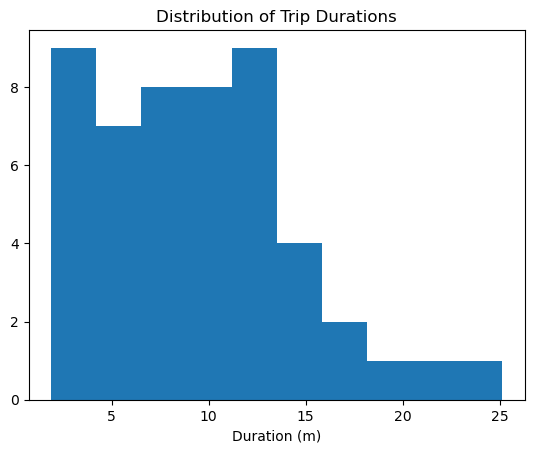

In [13]:
# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

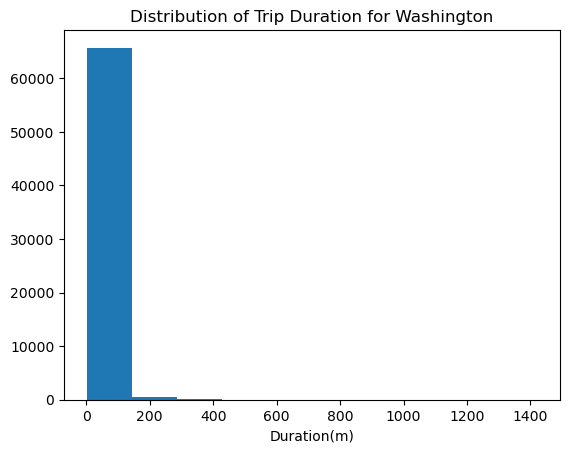

In [14]:
def plot_graph(filename,city):
    
     # Initialize an empty list to store trip durations
    durations = []
    
    # Open the CSV file for reading 
    with open(filename,"r") as csv_file:
        
        # Create a CSV DictReader for the file
        trip_reader = csv.DictReader(csv_file)
        # Iterate through each row in the file
        for row in trip_reader:
            
            # Extract and convert the duration from the row, then add it to the list
            duration = float(row["duration"])
            durations.append(duration)
        # Plot a histogram of trip durations
        plt.hist(durations)
        # Set the title, xlabel, and show the plot
        plt.title("Distribution of Trip Duration for Washington")
        plt.xlabel("Duration(m)")
        plt.show()
        
# Example usage for Washington
data_file_Washington = './data/Washington-2016-Summary.csv'
plot_graph(data_file_Washington, 'Washington')

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 
For Subscribers: write answer
For Customers: write answer

Since both the graph are dense on one side therefore they are Right Skewed Distribution. 

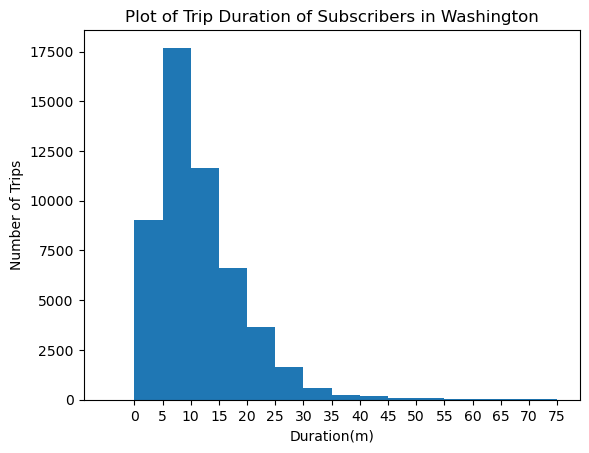

In [15]:
def plot_subscriber(filename):
    
    # Initialize an empty list to store trip durations of subscribers
    duration_subscriber =[]
    
    # Open the CSV file for reading
    with open(filename,"r") as csv_file:
        # Create a CSV DictReader for the file
        trip_reader = csv.DictReader(csv_file)
        
        # Iterate through each row in the file
        for row in trip_reader:
            # Extract duration and user type from the row
            duration = float(row["duration"])
            user_type = row["user_type"]
            
            # Check if the user type is "Subscriber" and add the duration to the list
            if user_type == "Subscriber":
                duration_subscriber.append(duration)
            else:
                pass
        
        # Plot a histogram of trip durations for subscribers
        plt.hist(duration_subscriber, bins = np.arange(-5,80,5))
        
        # Set the title, xlabel, ylabel, and xticks for the plot
        plt.title("Plot of Trip Duration of Subscribers in Washington")
        plt.xlabel("Duration(m)")
        plt.ylabel("Number of Trips")
        plt.xticks(np.arange(0,80,5))
     
        plt.show()
        
# Example usage for Washington           
data_file_Washington = './data/Washington-2016-Summary.csv'
plot_subscriber(data_file_Washington)


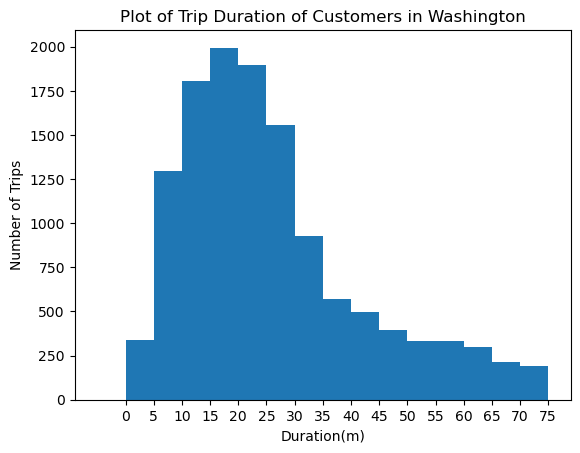

In [16]:
def plot_customer(filename):
    
    # Initialize an empty list to store trip durations of customers
    duration_customer =[]
    
    # Open the CSV file for reading
    with open(filename,"r") as csv_file:
        
        # Create a CSV DictReader for the file
        trip_reader = csv.DictReader(csv_file)
        
        # Iterate through each row in the file
        for row in trip_reader:
            # Extract duration and user type from the row
            duration = float(row["duration"])
            user_type = row["user_type"]
            
            # Check if the user type is "Customer" and add the duration to the list
            if user_type == "Customer":
                duration_customer.append(duration)
            else:
                pass
        # Plot a histogram of trip durations for customers
        plt.hist(duration_customer, bins = np.arange(-5,80,5))
        
        # Set the title, xlabel, ylabel, and xticks for the plot
        plt.title("Plot of Trip Duration of Customers in Washington")
        plt.xlabel("Duration(m)")
        plt.ylabel("Number of Trips")
        plt.xticks(np.arange(0,80,5))
        plt.show()

# Example usage for Washington        
data_file_Washington = './data/Washington-2016-Summary.csv'
plot_customer(data_file_Washington)


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: 
write your ans

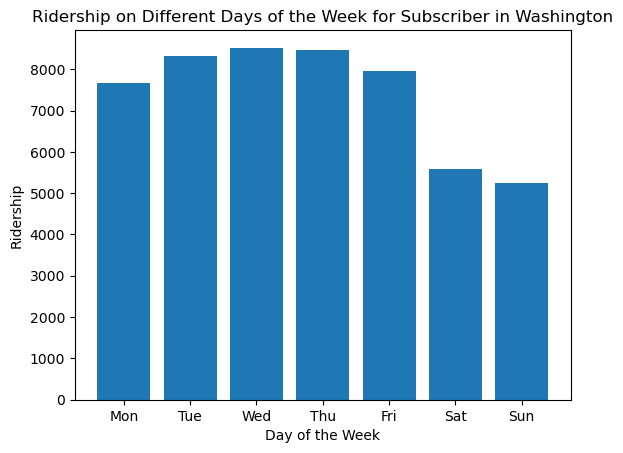

For Subscriber: Ridership was greater on Weekdays as compared to Weekends. Maximum ridership was on Wednesday


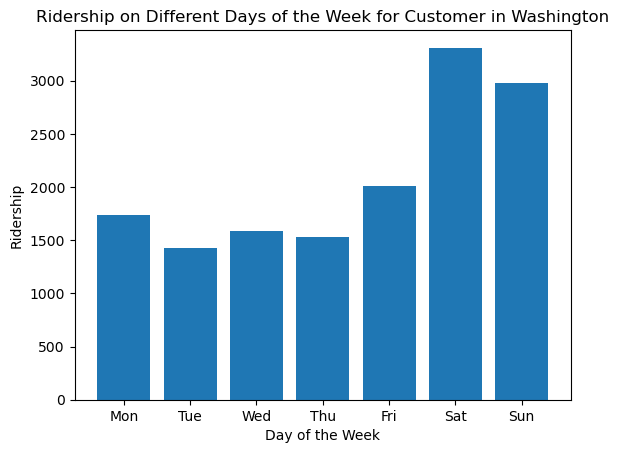

For Customer: Ridership was greater on Weekends as compared to Weekdays. Maximum ridership was on Saturday


In [17]:
def per_day_analysis(filename, usertype):
    
    # Define a list of weekdays and their abbreviations
    weekdays = list(calendar.day_name)
    weekdays_abbr = [day[:3] for day in weekdays]
    
    # Initialize a list to store ridership counts for each day of the week
    ridership = [0] * len(weekdays)
    
    # Open the CSV file for reading
    with open(filename, 'r') as file:
        
        # Create a CSV DictReader for the file
        trip_reader = csv.DictReader(file)
        
        # Iterate through each row in the file
        for row in trip_reader:
            # Check if the user type matches the specified type
            if row['user_type'] == usertype:
                # Extract the day of the week from the row
                day_of_week = row['day_of_week']
                # Check if the day of the week is valid
                if day_of_week in weekdays:
                    # Increment the ridership count for the corresponding day
                    ridership[weekdays.index(day_of_week)] += 1
    
    # Plot a bar chart of ridership for each day of the week
    plt.bar(weekdays_abbr, ridership)
    plt.xlabel('Day of the Week')
    plt.ylabel('Ridership')
    plt.title(f'Ridership on Different Days of the Week for {usertype} in Washington')
    plt.show()
    
    # Find the index of the maximum and minimum ridership days
    max_day_index = ridership.index(max(ridership))
    min_day_index = ridership.index(min(ridership))
    
    # Determine the category of maximum and minimum ridership days
    if weekdays[max_day_index] in ['Saturday', 'Sunday']:
        max_day_category = 'Weekends'
        min_day_category = 'Weekdays'
    else:
        max_day_category = 'Weekdays'
        min_day_category = 'Weekends'
    
    # Get the names of the maximum and minimum ridership days
    max_day = weekdays[max_day_index]
    min_day = weekdays[min_day_index]
    
    # Return a summary string
    return f"For {usertype}: Ridership was greater on {max_day_category} as compared to {min_day_category}. Maximum ridership was on {max_day}"

# Call the method with Washington data file
data_file_Washington = './data/Washington-2016-Summary.csv'

# Call for subscriber
print(per_day_analysis(data_file_Washington, 'Subscriber'))

# Call for customer
print(per_day_analysis(data_file_Washington, 'Customer'))


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?





